In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('AB_Test_Results.csv')
data.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [3]:
data.shape

(10000, 3)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [5]:
data.isnull().sum()

USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64

In [6]:
data['VARIANT_NAME'].nunique()

2

In [7]:
data['VARIANT_NAME'].value_counts()

variant    5016
control    4984
Name: VARIANT_NAME, dtype: int64

In [8]:
data['REVENUE'].nunique()

101

In [9]:
data['USER_ID'].nunique()

6324

In [10]:
data.duplicated().sum()

2067

In [11]:
data = data.drop_duplicates()

In [12]:
data.shape

(7933, 3)

In [13]:
uniq = data.groupby('USER_ID')['VARIANT_NAME'].nunique().value_counts()
uniq

1    4783
2    1541
Name: VARIANT_NAME, dtype: int64

In [14]:
data.groupby('USER_ID')['VARIANT_NAME'].nunique().value_counts().iloc[0] == uniq.iloc[0]

True

Exploratory Data Analysis

<AxesSubplot: xlabel='VARIANT_NAME', ylabel='REVENUE'>

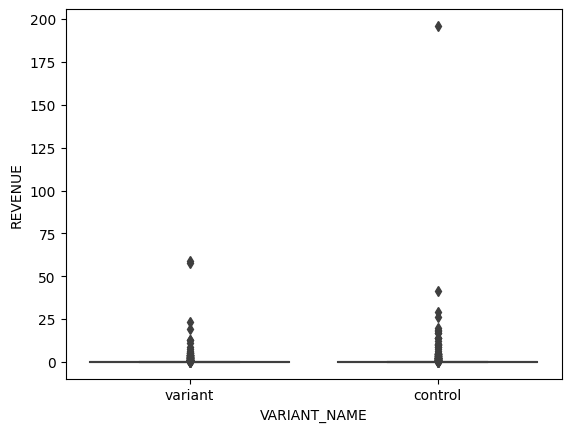

In [15]:
sns.boxplot(x='VARIANT_NAME', y='REVENUE', data=data)

In [16]:
data = data[data['REVENUE'] < 150]

<AxesSubplot: xlabel='VARIANT_NAME', ylabel='REVENUE'>

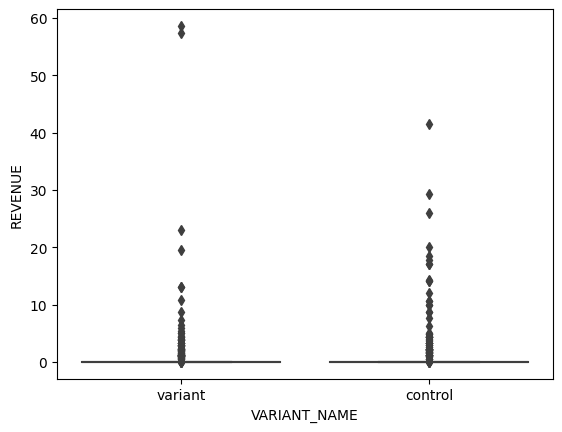

In [17]:
sns.boxplot(x='VARIANT_NAME', y='REVENUE', data=data)

<AxesSubplot: xlabel='VARIANT_NAME', ylabel='REVENUE'>

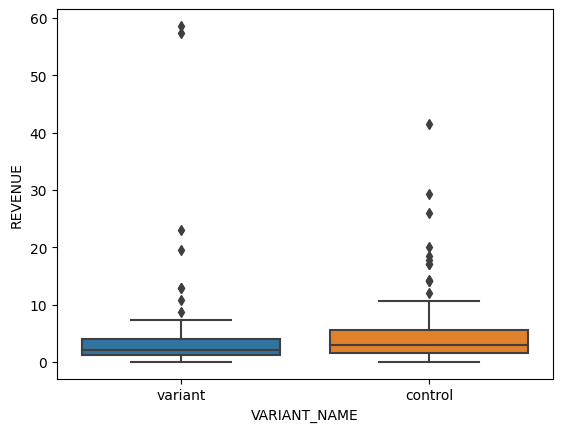

In [19]:
sns.boxplot(data=data[data['REVENUE']>0], x='VARIANT_NAME', y='REVENUE')

In [20]:
data.groupby(by='VARIANT_NAME').agg({'USER_ID': 
[("Total",len), ('Unique','nunique')], 'REVENUE': 
[("Count",'count'), ("Total",'sum'), ("Avg",'mean'), ("Median",'median'), ("Std",'std')]})

USER_ID        REVENUE                                   
               Total Unique   Count   Total       Avg Median       Std
VARIANT_NAME                                                          
control         3972   3930    3972  446.99  0.112535    0.0  1.297478
variant         3960   3934    3960  351.47  0.088755    0.0  1.479239

In [21]:
data[data['REVENUE']>0].groupby(by='VARIANT_NAME').agg({'USER_ID': 
[("Total",len), ('Unique','nunique')],'REVENUE': 
[("Count",'count'), ("Total",'sum'), ("Avg",'mean'), ("Median",'median'), ("Std",'std')]})

USER_ID        REVENUE                                   
               Total Unique   Count   Total       Avg Median       Std
VARIANT_NAME                                                          
control           79     79      79  446.99  5.658101   2.93  7.343373
variant           72     71      72  351.47  4.881528   2.17  9.913973

Cek Distribusi Data

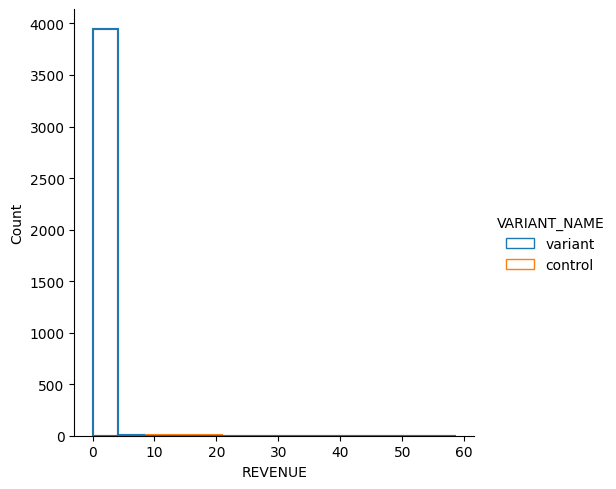

In [22]:
sns.displot(data=data, x='REVENUE', hue='VARIANT_NAME', fill=False)

In [23]:
from scipy.stats import shapiro
for i in ['variant','control']:
    x = shapiro(data.loc[data.VARIANT_NAME==i, 'REVENUE'])[1]
    if x > 0.05:
        print(f"Variant: {i} is normal distribution")
    else:
        print(f"Variant: {i} is not normal distribution")

Variant: variant is not normal distribution
Variant: control is not normal distribution


Cek Variances

In [24]:
from scipy.stats import levene

control = data[data['VARIANT_NAME']=='control']
variant = data[data['VARIANT_NAME']=='variant']
levene(control["REVENUE"][control["REVENUE"] >= 0], variant["REVENUE"][variant["REVENUE"] >= 0])

LeveneResult(statistic=0.5793994345616832, pvalue=0.4465704537527)

Cek Ukuran Populasi Data

In [25]:
from scipy.stats import mannwhitneyu

mannwhitneyu(variant['REVENUE'], control['REVENUE'])

MannwhitneyuResult(statistic=7850692.0, pvalue=0.5656142915168543)